# 第三章 用一个简单的界面完成NLP任务 🗞️

加载HF API密钥和相关Python库

In [1]:
import os
import io
from IPython.display import Image, display, HTML
from PIL import Image
import base64 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

## 一、选择使用api在线服务
您可以选择在线调用api的方式，所以首先，我们要设置我们的API密钥，然后我们将设置我们的带摘要功能的助手函数。在这里，我们有一个用于推理端点API的端点，它将使用课程上设置的API密钥工作，该API基本上调用一个函数，如下所示。

In [2]:
# 导入一些必要的包
import requests, json

#总结函数
def get_completion(inputs, parameters=None,ENDPOINT_URL=os.environ['HF_API_SUMMARY_BASE']): 
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL, headers=headers,
                                data=json.dumps(data)
                               )
    return json.loads(response.content.decode("utf-8"))

## 二、构建一个文本摘要应用程序

同学们也可以选择本地部署模型，模型下载地址：https://huggingface.co/sshleifer/distilbart-cnn-12-6

In [4]:
# 导入所需的库
from transformers import pipeline

# 创建一个文本摘要生成的pipeline，使用预训练模型"sshleiferdistilbart-cnn-12-6"
get_completion = pipeline("summarization", model="sshleiferdistilbart-cnn-12-6")

# 定义一个函数用于生成文本摘要
def summarize(input):
    # 使用pipeline生成文本摘要
    output = get_completion(input)
    # 提取摘要文本并返回
    return output[0]['summary_text']

In [5]:
# pprint包可以更好的展示json格式的内容
import pprint

text_en = '''The tower is 324 metres (1,063 ft) tall, about the same height
        as an 81-storey building, and the tallest structure in Paris. 
        Its base is square, measuring 125 metres (410 ft) on each side. 
        During its construction, the Eiffel Tower surpassed the Washington 
        Monument to become the tallest man-made structure in the world,
        a title it held for 41 years until the Chrysler Building
        in New York City was finished in 1930. It was the first structure 
        to reach a height of 300 metres. Due to the addition of a broadcasting 
        aerial at the top of the tower in 1957, it is now taller than the 
        Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the 
        Eiffel Tower is the second tallest free-standing structure in France 
        after the Millau Viaduct.'''

pprint.pprint(get_completion(text_en))

[{'summary_text': ' The tower is 324 metres (1,063 ft) tall, about the same '
                  'height as an 81-storey building . It is the tallest '
                  'structure in Paris and the second tallest free-standing '
                  'structure in France after the Millau Viaduct . It was the '
                  'first structure in the world to reach a height of 300 '
                  'metres .'}]


In [6]:
# pprint包可以更好的展示json格式的内容
import pprint

# 这个模型对中文的支持并没有英文好，所以大家知道这个函数的作用是总结就好。
text_zh = '''这座塔高324米（1,063英尺），与一座81层楼高的建筑物大致相同高度，
            是巴黎最高的建筑物。其底座呈正方形，每边长125米（410英尺）。
            在建造过程中，埃菲尔铁塔超越了华盛顿纪念碑，成为世界上最高的人造结构，
            这个称号保持了41年，直到纽约市的克莱斯勒大厦于1930年完工。
            它是第一个达到300米高度的建筑物。由于在塔顶增加了一个广播天线，
            它比克莱斯勒大厦高出5.2米（17英尺）。不包括发射器在内，
            埃菲尔铁塔是法国第二高的独立结构，仅次于米洛高架桥。'''

pprint.pprint(get_completion(text_zh))

[{'summary_text': ' 这座塔 高324米（1,063英尺）   \xa0\xa0- \xa0‘�predered’ \xa0- 是巴 '
                  '��最 \xa0augmented\xa0a\xa0gave’s \xa0agility\xa0-\xa0“I’m '
                  "not sure what happened to me.”   ‘’�s”: “”. “\xa0” . ‘'”’ "
                  '‘�\u2009’’: \u2009\xa0\u2009 \u2009'}]


### 2.1 开始学习 Gradio `gr.Interface` 

#### 2.1.1 如何让grido在本地运行?
如果你想在本地运行代码，代码将非常类似。只需在launch方法中删除所有参数即可。

```py
demo.launch()
```

In [ ]:
# 导入所需的库
import gradio as gr

# 定义生成文本摘要的函数
def summarize(input):
    output = get_completion(input)  # 使用之前定义的文本摘要生成函数
    return output[0]['summary_text']

# 关闭所有之前的Gradio界面（如果有的话）
gr.close_all()

# 创建Gradio界面
demo = gr.Interface(fn=summarize, inputs="text", outputs="text")

# 启动界面
demo.launch()

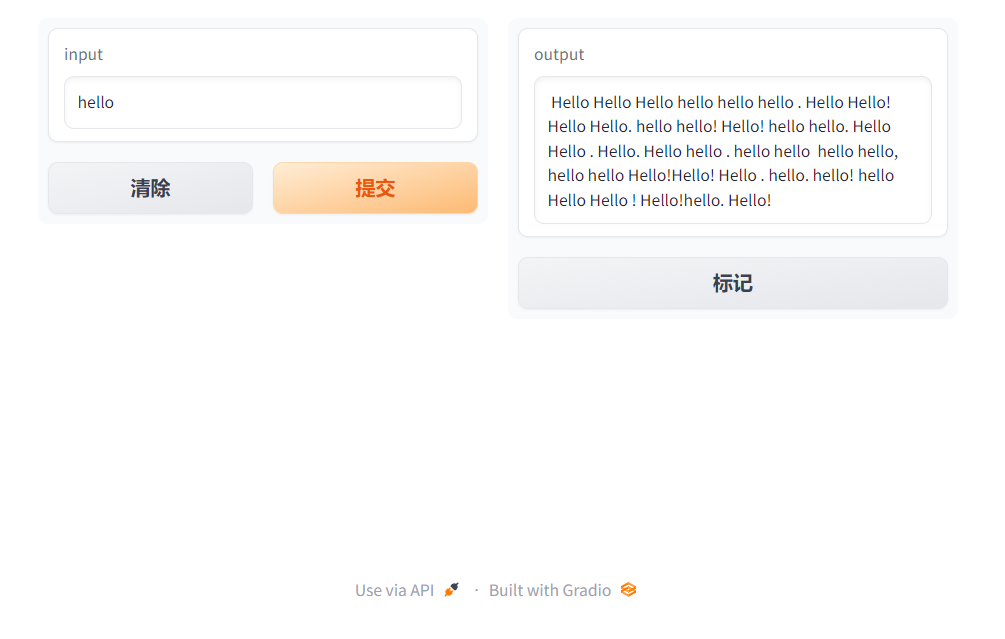

也可以添加' demo.launch(share=True) '来创建一个公共链接，以便与朋友分享。

- fn=summarize: 这是要应用于用户输入的函数，即生成文本摘要的函数。
- inputs=[gr.Textbox(label="Text to summarize", lines=6)]: 这定义了用户输入的部分。gr.Textbox 创建一个文本框，label 参数用于显示文本框前面的标签，lines 参数定义文本框的行数。
- outputs=[gr.Textbox(label="Result", lines=3)]: 这定义了输出部分。与输入类似，这里使用文本框来显示摘要的结果。
- title="Text summarization with distilbart-cnn": 这是界面的标题，将显示在界面的顶部。
- description="Summarize any text using the shleifer/distilbart-cnn-12-6 model under the hood!": 这是界面的描述，提供有关界面功能的更多信息。
- demo.launch(share=True): 启动 Gradio 界面，并通过共享模式使其他用户能够访问该界面。

In [ ]:
# 导入所需的库
import gradio as gr

# 定义生成文本摘要的函数
def summarize(input):
    output = get_completion(input)  # 使用之前定义的文本摘要生成函数
    return output[0]['summary_text']

# 关闭所有之前的Gradio界面（如果有的话）
gr.close_all()

# 创建Gradio界面
demo = gr.Interface(
    fn=summarize,  # 指定要用于处理输入的函数
    inputs=[gr.Textbox(label="Text to summarize", lines=6)],  # 输入部分的设置
    outputs=[gr.Textbox(label="Result", lines=3)],  # 输出部分的设置
    title="Text summarization with distilbart-cnn",  # 界面标题
    description="Summarize any text using the `shleifer/distilbart-cnn-12-6` model under the hood!"  # 界面描述
)

# 启动共享模式的界面，允许其他用户访问
demo.launch(share=True)

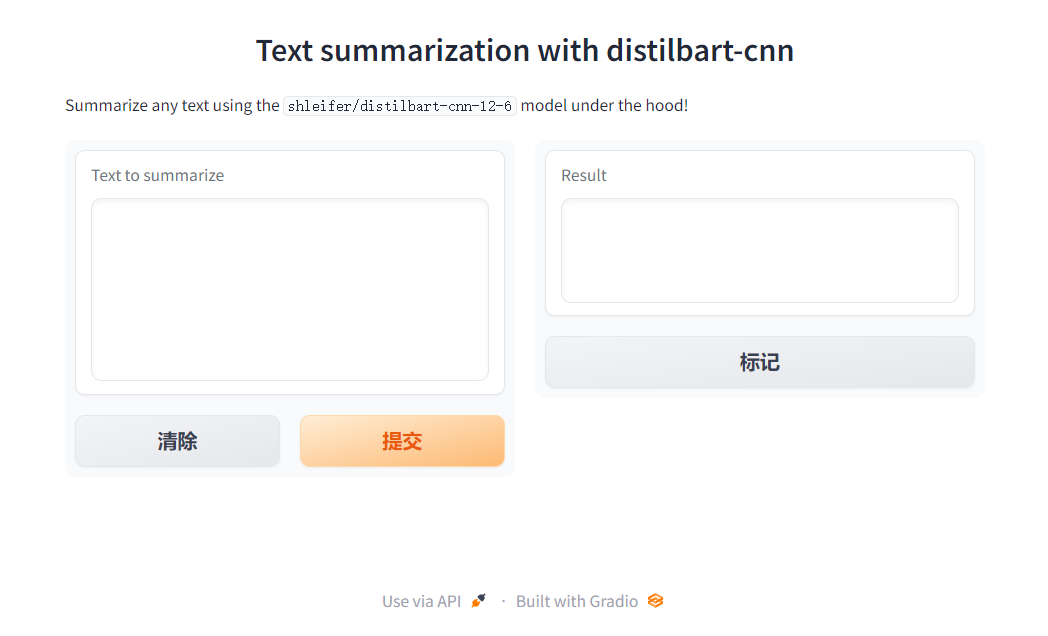

## 三、构建一个命名实体识别应用程序

使用这个[推理端点](https://huggingface.co/inference-endpoints)用于`dslim/bert-base-NER`，这是一个在命名实体识别任务上进行了微调的拥有108M参数的BART模型。

### 3.1 如何让它在本地运行?

这里笔者继续选择在本地加载模型，模型下载地址：https://huggingface.co/dslim/bert-base-NER

In [9]:
# 导入所需的库
from transformers import pipeline

# 创建一个命名实体识别（NER）的pipeline，使用预训练模型"dslimbert-base-NER"
get_completion = pipeline("ner", model="dslimbert-base-NER")

# 定义一个函数用于进行命名实体识别
def ner(input):
    # 使用pipeline进行命名实体识别
    output = get_completion(input)
    # 返回一个字典，包含原始输入文本和识别到的命名实体
    return {"text": input, "entities": output}

Some weights of the model checkpoint at dslimbert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


如果你想使用在线api，那请使用以下代码
```python
    API_URL = os.environ['HF_API_NER_BASE'] #NER endpoint
    text = "My name is Andrew, I'm building DeepLearningAI and I live in California"
    get_completion(text, parameters=None, ENDPOINT_URL= API_URL)
    def ner(input):
        output = get_completion(input, parameters=None, ENDPOINT_URL=API_URL)
        return {"text": input, "entities": output}
```

这里相对上面的gr.Interface有几个参数不同，稍微解释一下：

- allow_flagging="never": 这将禁止用户标记内容，不允许标记不良或不恰当的内容。
- examples=["My name is Andrew and I live in California", "My name is Poli and work at HuggingFace"]: 这里提供了两个示例输入，用于展示界面功能。用户可以在文本框中直接加载这些示例文本，以查看命名实体识别的效果。
- gr.HighlightedText 是 Gradio 中的一个部件（widget），用于在文本中高亮显示特定文本片段。在这个场景中，它被用来显示带有标记实体的文本。

In [ ]:
# 导入所需的库
import gradio as gr

# 定义命名实体识别（NER）函数，与之前定义的ner函数相同
def ner(input):
    output = get_completion(input)
    return {"text": input, "entities": output}

# 关闭所有之前的Gradio界面（如果有的话）
gr.close_all()

# 创建Gradio界面
demo = gr.Interface(
    fn=ner,  # 指定用于处理输入的函数
    inputs=[gr.Textbox(label="Text to find entities", lines=2)],  # 输入部分的设置
    outputs=[gr.HighlightedText(label="Text with entities")],  # 输出部分的设置
    title="NER with dslim/bert-base-NER",  # 界面标题
    description="Find entities using the `dslim/bert-base-NER` model under the hood!",  # 界面描述
    allow_flagging="never",  # 设置不允许标记内容
    examples=[  # 提供易于使用的示例输入，用于展示界面功能
        "My name is Andrew and I live in California",
        "My name is Poli and work at HuggingFace"
    ]
)

# 启动共享模式的界面，允许其他用户访问
demo.launch(share=True)

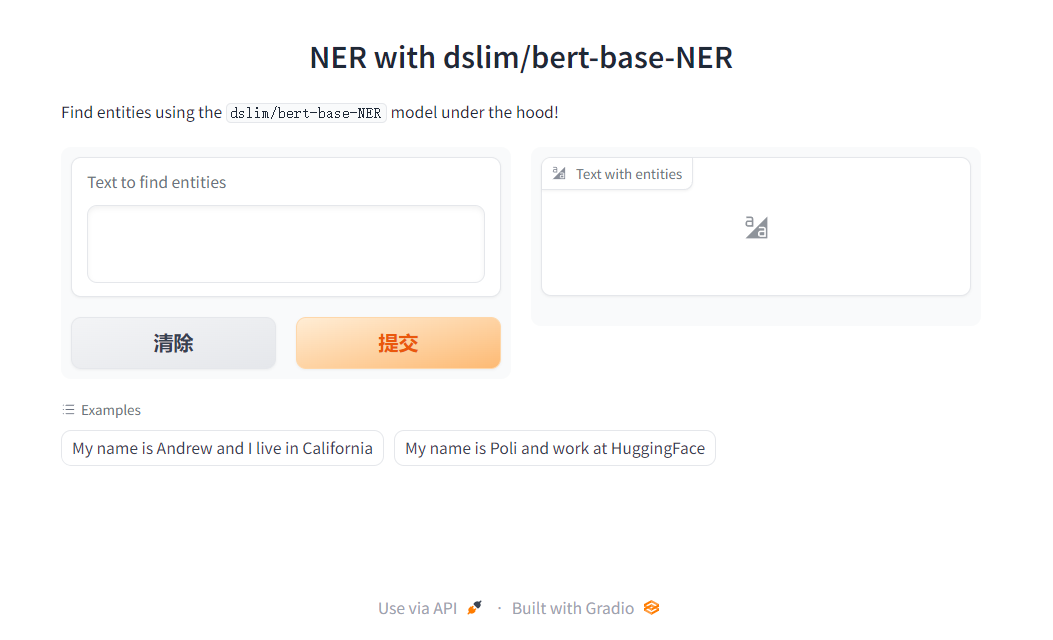

### 3.2 添加一个辅助函数来合并tokens

In [ ]:
# 定义一个函数，用于将相同实体的多个分词合并为一个实体
def merge_tokens(tokens):
    merged_tokens = []
    for token in tokens:
        if merged_tokens and token['entity'].startswith('I-') and merged_tokens[-1]['entity'].endswith(token['entity'][2:]):
            # 如果当前分词延续了上一个实体，将它们合并
            last_token = merged_tokens[-1]
            last_token['word'] += token['word'].replace('##', '')
            last_token['end'] = token['end']
            last_token['score'] = (last_token['score'] + token['score']) / 2
        else:
            # 否则，将分词添加到合并后的实体列表中
            merged_tokens.append(token)

    return merged_tokens

# NER函数，与之前类似，但在输出前使用merge_tokens函数合并实体分词
def ner(input):
    output = get_completion(input)
    return {"text": input, "entities": output}

# 关闭之前的Gradio界面（如果有的话）
gr.close_all()

# 创建Gradio界面，与之前类似，但在NER函数中使用了合并后的实体分词
demo = gr.Interface(
    fn=ner,
    inputs=[gr.Textbox(label="Text to find entities", lines=2)],
    outputs=[gr.HighlightedText(label="Text with entities")],
    title="NER with dslim/bert-base-NER",
    description="Find entities using the `dslim/bert-base-NER` model under the hood!",
    allow_flagging="never",
    examples=[
        "My name is Andrew, I'm building DeeplearningAI and I live in California",
        "My name is Poli, I live in Vienna and work at HuggingFace"
    ]
)

# 启动共享模式的界面，允许其他用户访问
demo.launch(share=True)

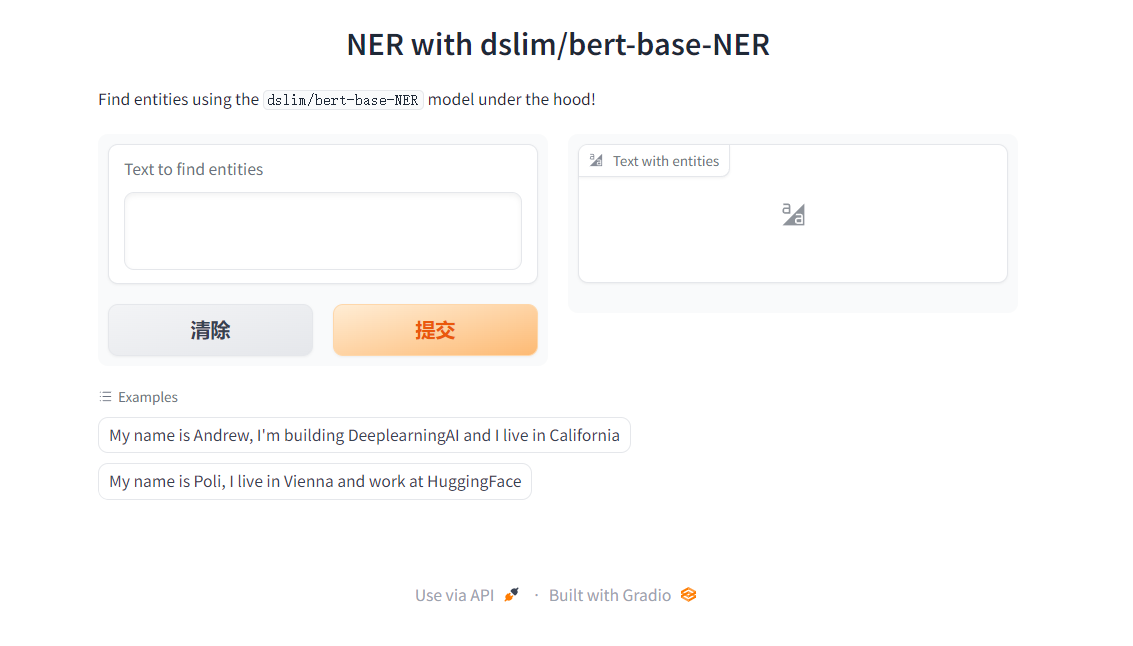

In [ ]:
gr.close_all()